In [1]:
#Import the necessity function 
import numpy  as np
import pandas as pd 

In [2]:
#read the CSV file
df_ = pd.read_csv('customer.csv')
#print the first five dataset
df_.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [3]:
#print the how many rows and columns are present
print("The rows are in this dataset is: ", df_.shape[0],'\n')
print("The columns name are in this dataset is:", df_.shape[1],'\n')

The rows are in this dataset is:  50 

The columns name are in this dataset is: 5 



In [4]:
#show the data type of this dataset 
for column_name_, data_types_ in enumerate(df_.dtypes):
    print(f"{df_.columns[column_name_]:10} data type is:  {data_types_}")

age        data type is:  int64
gender     data type is:  object
review     data type is:  object
education  data type is:  object
purchased  data type is:  object


In [5]:
#select all "OBJECT" data types 
_categorical_data = df_.select_dtypes(include = "object")
#print the categorical data
_categorical_data.head()

,gender,review,education,purchased
0,Female,Average,School,No
1,Female,Poor,UG,No
2,Female,Good,PG,No
3,Female,Good,PG,No
4,Female,Average,UG,No


In [6]:
#print the "VALUE_COUNTS()" for each columns
for column_name_ in _categorical_data.columns:
    print(f"{column_name_:10}:\n{_categorical_data[column_name_].value_counts()}\n")

gender    :
Female    29
Male      21
Name: gender, dtype: int64

review    :
Good       18
Poor       18
Average    14
Name: review, dtype: int64

education :
PG        18
School    16
UG        16
Name: education, dtype: int64

purchased :
No     26
Yes    24
Name: purchased, dtype: int64



# Ordinal Encoding in this dataset

In [7]:
#print the _categorical data
_categorical_data.head()

,gender,review,education,purchased
0,Female,Average,School,No
1,Female,Poor,UG,No
2,Female,Good,PG,No
3,Female,Good,PG,No
4,Female,Average,UG,No


In [8]:
#Here, "review" and "education" column is basically "ORDINAL" categorical features
#print the number of unique value of those columns
print("Review column has total number of unique value    = ", _categorical_data.loc[:, 'review'].nunique(),"\n\nThe unique values of this particular columns    = ", _categorical_data.loc[:, 'review'].unique(),'\n')
print("Education column has total number of unique value = ", _categorical_data.loc[:, 'education'].nunique(),'\n')
print("The unique values of this particular columns are  = ", _categorical_data.loc[:, 'education'].unique())

Review column has total number of unique value    =  3 

The unique values of this particular columns    =  ['Average' 'Poor' 'Good'] 

Education column has total number of unique value =  3 

The unique values of this particular columns are  =  ['School' 'UG' 'PG']


In [9]:
#Do the "Review" column in the ordinal encoding
_review_order      = {'Good': 2, 'Average': 1, 'Poor': 0}
_review_order_list = []
for order_ in _categorical_data.loc[:, 'review'].map(_review_order):
    _review_order_list.append(order_)
    print(order_, end = " ")
    
print("\n")

_education_order      = {'PG': 2, 'UG': 1, 'School': 0}
_education_order_list = []

for order_ in _categorical_data.loc[:, 'education'].map(_education_order):
    _education_order_list.append(order_)
    print(order_, end = " ")

1 0 2 2 1 1 2 0 1 2 2 2 0 1 0 0 0 0 2 0 1 1 0 2 1 2 0 0 0 1 1 0 1 2 1 0 2 1 2 0 2 2 2 0 1 0 0 2 2 2 

0 1 2 2 1 0 0 0 1 1 1 1 0 0 2 1 1 1 0 2 0 2 2 0 2 0 2 2 0 1 1 0 1 2 0 0 1 2 0 2 0 2 2 2 1 2 2 2 1 1 

In [10]:
#Do the same things using "SKLEARN"

#In order to do this we will have to split the dataset
from sklearn.model_selection import train_test_split
#X and Y should be splitted
X = _categorical_data.iloc[:, 1:-1]
y = _categorical_data.iloc[:, -1]

#split this into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#import the Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
#call the "OrdinalEncoder"
_ordinal_encoder = OrdinalEncoder(categories = [['Poor','Average','Good'],['School','UG','PG']])

# _ordinal_encoder.fit(X_train)
X_train = _ordinal_encoder.fit_transform(X_train)
print("Done 1 \n")
X_test  = _ordinal_encoder.transform(X_test)
print("Done 2")

Done 1 

Done 2


In [11]:
#concatenate this X_train and X_test
_ordinal_encoder = np.concatenate((X_train, X_test), axis = 0)
_data_frame      = pd.DataFrame(_ordinal_encoder, columns = ['review', 'education'])
_data_frame.head()

,review,education
0,0.0,0.0
1,0.0,1.0
2,0.0,1.0
3,2.0,1.0
4,0.0,2.0


# Label Encoding

In [12]:
#print the dataframe
_categorical_data.head()

,gender,review,education,purchased
0,Female,Average,School,No
1,Female,Poor,UG,No
2,Female,Good,PG,No
3,Female,Good,PG,No
4,Female,Average,UG,No


In [13]:
#Here, "purchased" column needs to do "labelEncoder()"

#Do the things manually
purchased_ = {'No': 0, 'Yes': 1}

#map this into the dataframe
for labelEncoder_ in _categorical_data.loc[: , 'purchased'].map(purchased_):
    print(labelEncoder_, end = " ")

0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 

In [14]:
##Do the same things using "SKLEARN"

#import the function
from sklearn.preprocessing import LabelEncoder

labelEncoder_ = LabelEncoder()

y_train = labelEncoder_.fit_transform(y_train)
y_test  = labelEncoder_.transform(y_test)

In [15]:
#concatenate these y_train and y_test
list_ = np.concatenate((y_train, y_test), axis = 0)
for labelEnoder_ in list_:
    print(labelEnoder_, end = " ")

1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 

# ONE HOT ENCODING

In [16]:
#print the dataset of real one 
df_.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [17]:
#Here, "gender" column is basically "nominal" categorical data - so we can easily use "ONE HOT ENCODING"
#In order to do this, what we will have to use is "pd"
pd.get_dummies(df_, columns = ['gender'], drop_first = True).head()

,age,review,education,purchased,gender_Male
0,30,Average,School,No,0
1,68,Poor,UG,No,0
2,70,Good,PG,No,0
3,72,Good,PG,No,0
4,16,Average,UG,No,0


# COLUMN TRANSFORMER

In [18]:
X = df_.iloc[:, :-1]
y = df_.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [19]:
X_train

,age,gender,review,education
12,51,Male,Poor,School
4,16,Female,Average,UG
37,94,Male,Average,PG
8,65,Female,Average,UG
3,72,Female,Good,PG
6,18,Male,Good,School
41,23,Male,Good,PG
46,64,Female,Poor,PG
47,38,Female,Good,PG
15,75,Male,Poor,UG


In [20]:
#Import the "column transformer" library
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#create an object
columnTransformer_ = ColumnTransformer(transformers = [
    ('one_hot_encoding', OneHotEncoder(drop = 'first', sparse = False),['gender']),
    ('ordinal_encoding', OrdinalEncoder(categories = [['Poor', 'Average', 'Good'], ['School','UG','PG']]), ['review','education'])
#     ('label_encoding'  , LabelEncoder(),['purchased'])
], remainder = 'passthrough')

In [21]:
y_train

12     No
4      No
37    Yes
8      No
3      No
6      No
41    Yes
46     No
47    Yes
15     No
9     Yes
16    Yes
24    Yes
34     No
31    Yes
0      No
44     No
27     No
33    Yes
5     Yes
29    Yes
11    Yes
36    Yes
1      No
21     No
2      No
43     No
35    Yes
23     No
40     No
10    Yes
22    Yes
18     No
49     No
20    Yes
7     Yes
42    Yes
14    Yes
28     No
38     No
Name: purchased, dtype: object

In [22]:
#fit the train and test
X_train = columnTransformer_.fit_transform(X_train)
X_test  = columnTransformer_.transform(X_test)

In [23]:
y = np.concatenate((y_train, y_test), axis = 0)
list_ = []
for value_ in y:
    if value_ == 'No':
        list_.append(0)
    else:
        list_.append(1)

In [24]:
np.array([list_]).reshape(50,1)

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]])

In [25]:
X = np.concatenate((X_train, X_test), axis = 0)
data_ = np.concatenate((X, np.array([list_]).reshape(50,1)), axis = 1)
data_

array([[ 1.,  0.,  0., 51.,  0.],
       [ 0.,  1.,  1., 16.,  0.],
       [ 1.,  1.,  2., 94.,  1.],
       [ 0.,  1.,  1., 65.,  0.],
       [ 0.,  2.,  2., 72.,  0.],
       [ 1.,  2.,  0., 18.,  0.],
       [ 1.,  2.,  2., 23.,  1.],
       [ 0.,  0.,  2., 64.,  0.],
       [ 0.,  2.,  2., 38.,  1.],
       [ 1.,  0.,  1., 75.,  0.],
       [ 1.,  2.,  1., 74.,  1.],
       [ 1.,  0.,  1., 59.,  1.],
       [ 0.,  1.,  2., 16.,  1.],
       [ 1.,  1.,  0., 86.,  0.],
       [ 0.,  0.,  0., 22.,  1.],
       [ 0.,  1.,  0., 30.,  0.],
       [ 0.,  1.,  1., 77.,  0.],
       [ 0.,  0.,  2., 69.,  0.],
       [ 0.,  2.,  2., 89.,  1.],
       [ 0.,  1.,  0., 31.,  1.],
       [ 0.,  1.,  1., 83.,  1.],
       [ 1.,  2.,  1., 74.,  1.],
       [ 0.,  2.,  1., 34.,  1.],
       [ 0.,  0.,  1., 68.,  0.],
       [ 1.,  1.,  2., 32.,  0.],
       [ 0.,  2.,  2., 70.,  0.],
       [ 1.,  0.,  2., 27.,  0.],
       [ 1.,  0.,  0., 74.,  1.],
       [ 0.,  2.,  0., 96.,  0.],
       [ 1.,  

# Mean Encoding - FOR NOMINAL

In [26]:
#print the dataset 
df_.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [27]:
#find the unique value
uniquePurchased_ = df_.iloc[:, -1].unique()
purchased_ = {key_:value_ for value_, key_ in enumerate(uniquePurchased_)}
df_.loc[:, 'purchased'] = df_.iloc[:, -1].map(purchased_)

#print the data frame
df_.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,0
1,68,Female,Poor,UG,0
2,70,Female,Good,PG,0
3,72,Female,Good,PG,0
4,16,Female,Average,UG,0


In [28]:
#Do the mean encoding
df_.loc[:, 'gender'] = df_.loc[:, 'gender'].map(df_.groupby(['gender'])['purchased'].mean().to_dict())
#print the data frame
df_.head()

,age,gender,review,education,purchased
0,30,0.482759,Average,School,0
1,68,0.482759,Poor,UG,0
2,70,0.482759,Good,PG,0
3,72,0.482759,Good,PG,0
4,16,0.482759,Average,UG,0


# Target Guided Ordinal Encoding

In [29]:
#import the dataset
df = pd.read_csv('customer.csv')
#print the data
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [30]:
#find the unique value
uniquePurchased_ = df_.iloc[:, -1].unique()
purchased_ = {key_:value_ for value_, key_ in enumerate(uniquePurchased_)}
df.loc[:, 'purchased'] = df_.iloc[:, -1].map(purchased_)

#print the data frame
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,0
1,68,Female,Poor,UG,0
2,70,Female,Good,PG,0
3,72,Female,Good,PG,0
4,16,Female,Average,UG,0


In [31]:
#In order to do this first of all we will have to find the maen of ordinal categorical data using "groupby"- for example "review"
targetGuidedEncodeInReview_ = {key_: value_ for value_, key_ in enumerate(df.groupby(['review'])['purchased'].mean().sort_values(ascending = True).index)}
df.loc[:, 'review'] = df.loc[:, 'review'].map(targetGuidedEncodeInReview_)
#print the data frame
df.head()

,age,gender,review,education,purchased
0,30,Female,0,School,0
1,68,Female,2,UG,0
2,70,Female,1,PG,0
3,72,Female,1,PG,0
4,16,Female,0,UG,0


# ONE HOT ENCODING WITH MANY FREQUENCY

In [32]:
#load the dataset
df = pd.read_csv('titanic.csv')
#print the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
#Find this unique value
df['Ticket'].nunique()

681

In [34]:
counts = df['Ticket'].value_counts()
counts

347082           7
1601             7
CA. 2343         7
3101295          6
CA 2144          6
                ..
SC/PARIS 2146    1
345779           1
2700             1
349212           1
110813           1
Name: Ticket, Length: 681, dtype: int64

In [35]:
counts[counts <= 4].index

Index(['4133', '17421', '349909', 'LINE', '347077', '113760', 'PC 17757',
       '113781', 'W./C. 6608', '2666',
       ...
       'STON/O2. 3101283', 'PC 17601', '347074', '3101267', '349910',
       'SC/PARIS 2146', '345779', '2700', '349212', '110813'],
      dtype='object', length=673)

In [36]:
df['Ticket'].value_counts() <= 4

347082           False
1601             False
CA. 2343         False
3101295          False
CA 2144          False
                 ...  
SC/PARIS 2146     True
345779            True
2700              True
349212            True
110813            True
Name: Ticket, Length: 681, dtype: bool

In [37]:
lowerTheshold_ = df['Ticket'].value_counts()[df['Ticket'].value_counts() <= 5].index
pd.get_dummies(df.loc[:, 'Ticket'].replace(lowerTheshold_, 'M'))

,1601,3101295,347082,347088,CA 2144,CA. 2343,M
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,1
887,0,0,0,0,0,0,1
888,0,0,0,0,0,0,1
889,0,0,0,0,0,0,1


In [38]:
df.loc[df.loc[:, 'Sex'] == 'male', 'Sex'].index

Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
            ...
            873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
           dtype='int64', length=577)

# Practise with all Encoders

In [39]:
#import the built_in function
import numpy as np
import pandas as pd

In [40]:
#import the dataset
df = pd.read_csv('customer.csv')
#print the dataset
df.head()
#Copy the dataset
df1_ = df.copy()

In [41]:
#We see that - in "target class or dependent column" is in the form of "categorical" and as a result -
#from our theoritical knowledge - what we will have to use is "Label Encoding". 
#Label Encoding by own, it will be hard to use "SKLEARN" in order to "Label Encoding"
#Check the "Target" column and find out the number of unique value

print("The number of unique value of the Target column is = ", df.loc[:, 'purchased'].nunique(), '\n')
#print the "unique value" in  that Target column
print("The unique value of this Target column is: ", [unique_ for unique_ in df.loc[:, 'purchased'].unique()])
print("\n")
#Create an "Dictonary comprehension" for that "Target column"
mapTarget_ = {value_: index_ for index_, value_ in enumerate(['No', 'Yes'])}
print("Map Target value, which i created in a Dictionary: ", mapTarget_, '\n')

#map that "Dictonary" value in that "purchased" column so that we can perfom "Label encoding"
df.loc[:, 'purchased'] = df.loc[:, 'purchased'].map(mapTarget_)
print("Done !")
#prin the dataFrame 
df.head()

The number of unique value of the Target column is =  2 

The unique value of this Target column is:  ['No', 'Yes']


Map Target value, which i created in a Dictionary:  {'No': 0, 'Yes': 1} 

Done !


,age,gender,review,education,purchased
0,30,Female,Average,School,0
1,68,Female,Poor,UG,0
2,70,Female,Good,PG,0
3,72,Female,Good,PG,0
4,16,Female,Average,UG,0


In [42]:
#count the value of "purchased" column
for value_, occurance_ in enumerate(df.loc[:, 'purchased'].value_counts()):
    print(f"{value_} occurs {occurance_} times in purchased column.")
    
print("Done !")

0 occurs 26 times in purchased column.
1 occurs 24 times in purchased column.
Done !


In [43]:
#find out the "value_counts" for all columns, which is categorical dataset 
for columnName_ in df.loc[:, ['gender', 'review', 'education']]:
    print(f"{columnName_:10} has value counts: {[occurance_ for occurance_ in df.loc[:, columnName_].value_counts()]}")

gender     has value counts: [29, 21]
review     has value counts: [18, 18, 14]
education  has value counts: [18, 16, 16]


In [44]:
#Create a function for one hot encoding
def oneHotEncoding_(data_, drop_first = False):
    return pd.get_dummies(data_, drop_first = drop_first)

#pass the "gender_" column into this oneHotEncoding function
df1_['gender_'] = oneHotEncoding_(df.loc[:, 'gender'], True)
#print("Done the one hot encoding !")
#print the dataset
df1_.head()

,age,gender,review,education,purchased,gender_
0,30,Female,Average,School,No,0
1,68,Female,Poor,UG,No,0
2,70,Female,Good,PG,No,0
3,72,Female,Good,PG,No,0
4,16,Female,Average,UG,No,0


In [45]:
##### One Hot Encoding with large of frequency
#import the "adult" dataset
df_ = pd.read_csv('adult.csv', na_values = ['?', '??', '???', '-'])
#copy this dataset
df = df_.copy()
#print the dataset
df_.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [46]:
#print("The shape of this datset")
print("The shape of this dataset is: ", df_.shape,'\n')
#print how many unique value are present of this "native-country"
print("The number of unique value is: ", df_.loc[:, 'native-country'].nunique(),'\n')
#find the unique value
for country_, value_ in zip(df_.loc[:, 'native-country'].value_counts().index, df_.loc[:, 'native-country'].value_counts().values):
    print(f"{country_:15} occurs in this dataset is \t= {value_}")

The shape of this dataset is:  (48842, 15) 

The number of unique value is:  41 

United-States   occurs in this dataset is 	= 43832
Mexico          occurs in this dataset is 	= 951
Philippines     occurs in this dataset is 	= 295
Germany         occurs in this dataset is 	= 206
Puerto-Rico     occurs in this dataset is 	= 184
Canada          occurs in this dataset is 	= 182
El-Salvador     occurs in this dataset is 	= 155
India           occurs in this dataset is 	= 151
Cuba            occurs in this dataset is 	= 138
England         occurs in this dataset is 	= 127
China           occurs in this dataset is 	= 122
South           occurs in this dataset is 	= 115
Jamaica         occurs in this dataset is 	= 106
Italy           occurs in this dataset is 	= 105
Dominican-Republic occurs in this dataset is 	= 103
Japan           occurs in this dataset is 	= 92
Guatemala       occurs in this dataset is 	= 88
Poland          occurs in this dataset is 	= 87
Vietnam         occurs in this dat

In [47]:
#In order to execute this what we will have to do is 
#1. we will just consider those values which value is greater than 100 
#2. rest of the values will be "others"
#my theshold value will be 100
thesholdValue_   = 100
lessThanTheshold_= df_.loc[:, 'native-country'].value_counts()[df_.loc[:, 'native-country'].value_counts() < thesholdValue_].index
pd.get_dummies(df_['native-country'].replace(lessThanTheshold_, 'others'), drop_first = True)

,China,Cuba,Dominican-Republic,El-Salvador,England,Germany,India,Italy,Jamaica,Mexico,Philippines,Puerto-Rico,South,United-States,others
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48838,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48839,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
###Count or Frequnecy Coding
df_.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20,Private,479296,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
96,25,Private,235218,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
97,49,Private,164877,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
98,59,Private,272087,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K


In [49]:
#####In order to do this mean or frequency coding basically we will have to find the frequency
def frequencyEncoding_(data_):
    return data_.map(data_.value_counts().to_dict())

#Pass the "native-country" column into this "frequencyEncoding_" function
df_['native_'] = frequencyEncoding_(df_.loc[:, 'native-country'])
#print the data
df_.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,native_
16748,38,Private,33983,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,43832.0
30565,17,Self-emp-inc,325171,10th,6,Never-married,Other-service,Own-child,Black,Male,0,0,35,United-States,<=50K,43832.0
4817,34,Private,83800,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,30,United-States,<=50K,43832.0
37905,41,Self-emp-inc,125831,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1887,55,United-States,>50K,43832.0
35000,32,Local-gov,100135,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,43832.0
20412,41,Private,221947,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K,43832.0
33299,42,Self-emp-inc,27187,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,>50K,43832.0
15647,33,Self-emp-not-inc,105229,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,43832.0
13474,36,Private,199217,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Mexico,<=50K,951.0
29264,27,Private,134890,Bachelors,13,Never-married,Tech-support,Own-child,White,Male,0,0,50,United-States,<=50K,43832.0


In [50]:
####Mean Encoding 
#print the dataset
df_.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,native_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,43832.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,43832.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,43832.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,43832.0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,43832.0


In [51]:
##### Mean Encoding is used to for "ordinal categorical dataset" - when our dataset has high frequency
###In order to do this - first of all determine that our "Target" column should be in "Numeric"
for unique_ in df_.loc[:, 'income'].unique():
    print("The unique value is : ", unique_,'\n')

The unique value is :  <=50K 

The unique value is :  >50K 



In [52]:
### Convert this by using "LABEL ENCODER"
def labelEncoder_(data_):
    unique_ = data_.unique()
    return data_.map({key_:value_ for value_, key_ in enumerate(unique_)})
#pass the income column in that labelEncoder()
df_['income_'] = labelEncoder_(df_.loc[:,'income'])
#Convert this into "int"
df_['income_'] = df_['income_'].astype('int')
#print the dataset
df_.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,native_,income_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,43832.0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,43832.0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,43832.0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,43832.0,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,43832.0,0


In [53]:
####In order to do this first of all we will have to do is to find the "group" based on "target"
meanDict_ = df_.groupby(['native-country'])['income_'].mean().to_dict()
#map the dataset
df_['country_mean_encoding'] = df_.loc[:, 'native-country'].map(meanDict_)
#print the dataset
df_.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,native_,income_,country_mean_encoding
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,43832.0,0,0.243977
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,43832.0,0,0.243977
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,43832.0,1,0.243977
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,43832.0,1,0.243977
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,43832.0,0,0.243977


In [54]:
#####Target Guided Ordinal Encoding
#Find the unique value of this "education"
count_= 0
for unique_ in df_.loc[:, 'education'].unique():
    count_+= 1
    print(unique_, end = " | ")
print("\n\nTotal unique value is = ", count_)

11th | HS-grad | Assoc-acdm | Some-college | 10th | Prof-school | 7th-8th | Bachelors | Masters | Doctorate | 5th-6th | Assoc-voc | 9th | 12th | 1st-4th | Preschool | 

Total unique value is =  16


In [55]:
####If I do normal "ordinal" encoding then it will not be wise for me to do this 
##As a result, what we will have to do is to "Target guided Ordinal Encoding"

##In order to do this first of all we will have to find the "Mean Encoding"

def targetGuidedOrdinalEncoding_(data_, targetColumn_):
    return data_.map({key_:value_ for value_, key_ in enumerate(df_.groupby([data_])[targetColumn_].mean().sort_values(ascending = True).index)})

#pass the "education" column into this targetGuidedOrdinalEncoding_
df_['education_'] = targetGuidedOrdinalEncoding_(df_.loc[:, 'education'], 'income_')
#print the dataset
df_.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,native_,income_,country_mean_encoding,education_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,43832.0,0,0.243977,2
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,43832.0,0,0.243977,8
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,43832.0,1,0.243977,11
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,43832.0,1,0.243977,9
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,43832.0,0,0.243977,9


In [56]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [57]:
#fill the null value with "missing"
for nullColumn_ in df.isnull().sum()[df.isnull().sum() >0].index:
    df.loc[:, nullColumn_].fillna(value = "Missing", inplace = True)
    print(f"Missing value is added in {nullColumn_}")
print("\n")
if df.isnull().sum().sum() == 0:
    print("There is no null value in this adult dataset")
else:
    print("There is null value in the dataset")

Missing value is added in workclass
Missing value is added in occupation
Missing value is added in native-country


There is no null value in this adult dataset


In [58]:
#Create all encoders function

##### lABEL ENCODRS
def labelEncoder_(data_):
    unique_ = data_.unique()
    return data_.map({key_:value_ for value_, key_ in enumerate(unique_)})

##### TARGET GUIDED ORDINAL ENCODER
def targetGuidedOrdinalEncoding_(data_, targetColumn_):
    return data_.map({key_:value_ for value_, key_ in enumerate(df_.groupby([data_])[targetColumn_].mean().sort_values(ascending = True).index)})

##### MEAN ENCODING
def meanEncoding_(data_, targetColumn_):
    return data_.map({key_:value_ for value_, key_ in enumerate(df_.groupby([data_])[targetColumn_].mean())})

#### COUNT OR FREQUENECY ENCODING
def frequencyEncoding_(data_):
    return data_.map(data_.value_counts().to_dict())


In [59]:
#print the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Missing,103497,Some-college,10,Never-married,Missing,Own-child,White,Female,0,0,30,United-States,<=50K


In [60]:
#convert the "target" column first of all
df['income'] = labelEncoder_(df_.loc[:, 'income'])
df['income'] = df['income'].astype('int')
#print the datadset
df.head(4)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1


In [61]:
#print the number of unique of each column
for column_ in df.select_dtypes(include = 'object'):
    print(f"Number of unique value in this {column_} is # {df.loc[:, column_].nunique()}")

Number of unique value in this workclass is # 9
Number of unique value in this education is # 16
Number of unique value in this marital-status is # 7
Number of unique value in this occupation is # 15
Number of unique value in this relationship is # 6
Number of unique value in this race is # 5
Number of unique value in this gender is # 2
Number of unique value in this native-country is # 42


In [62]:
#Normal one hot encoding
oneHotEncodingNormal_ = ['workclass', 'marital-status', 'relationship', 'race', 'gender']
#get dummies value
get_dummies_ = pd.get_dummies(df[oneHotEncodingNormal_], drop_first = True)
#concat the get_dummies value in the real dataset
df = pd.concat([df, get_dummies_], axis = 1)
#drop all columns, which have been used in one hot encoding
for dropColumns_ in oneHotEncodingNormal_:
    df.drop(dropColumns_, inplace = True, axis = 1)
    print(f"Dropped this {dropColumns_} column from the datset")
print("\n")
#print the dataset
df.head()

Dropped this workclass column from the datset
Dropped this marital-status column from the datset
Dropped this relationship column from the datset
Dropped this race column from the datset
Dropped this gender column from the datset




,age,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,25,226802,11th,7,Machine-op-inspct,0,0,40,United-States,0,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,HS-grad,9,Farming-fishing,0,0,50,United-States,0,...,0,0,0,0,0,0,0,0,1,1
2,28,336951,Assoc-acdm,12,Protective-serv,0,0,40,United-States,1,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,Some-college,10,Machine-op-inspct,7688,0,40,United-States,1,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,Some-college,10,Missing,0,0,30,United-States,0,...,0,0,1,0,0,0,0,0,1,0


In [63]:
#Target guided encoding in "education"
df['education'] = df.loc[:, 'education'].map({key_:value_ for value_, key_ in enumerate(df.groupby(['education'])['income'].mean().sort_values(ascending = True).index)})
print("Done target guided ordinal encoding !")
#print the dataset
df.head()

Done target guided ordinal encoding !


,age,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,25,226802,2,7,Machine-op-inspct,0,0,40,United-States,0,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,8,9,Farming-fishing,0,0,50,United-States,0,...,0,0,0,0,0,0,0,0,1,1
2,28,336951,11,12,Protective-serv,0,0,40,United-States,1,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,9,10,Machine-op-inspct,7688,0,40,United-States,1,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,9,10,Missing,0,0,30,United-States,0,...,0,0,1,0,0,0,0,0,1,0


In [64]:
#We will do "MEAN ENCODING"
for column_ in ['occupation', 'native-country']:
    df[column_] = df.loc[:, column_].map(df.groupby([column_])['income'].mean())
    print(f"{column_} mean encoding is completed !")
print("\n")
#print the data
df.head()

occupation mean encoding is completed !
native-country mean encoding is completed !




,age,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,25,226802,2,7,0.123097,0,0,40,0.243977,0,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,8,9,0.116107,0,0,50,0.243977,0,...,0,0,0,0,0,0,0,0,1,1
2,28,336951,11,12,0.313327,0,0,40,0.243977,1,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,9,10,0.123097,7688,0,40,0.243977,1,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,9,10,0.094340,0,0,30,0.243977,0,...,0,0,1,0,0,0,0,0,1,0


In [65]:
#### Do the standard scaler to transform the independent feature in a given range
##split the datset into X, y
y = df.loc[:, 'income']
df.drop(['income'], axis = 1, inplace = True)
X = df.loc[:,:]

In [66]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32

In [67]:
#Call the standard sacler function
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
#call the standard sacling function
standardScaler_ = StandardScaler()
#Scaling the X_train
X_train = standardScaler_.fit_transform(X_train)
#Scaling the X_test
X_test  = standardScaler_.transform(X_test)

In [68]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
baggingClassifier_ = BaggingClassifier(n_estimators = 10, base_estimator = RandomForestClassifier() )
baggingClassifier_.fit(X_train, y_train)
predictedValue_ = baggingClassifier_.predict(X_test)
accuracy_score(predictedValue_, y_test)

0.8680697731553517

In [69]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
xgboostClassifier_ = XGBClassifier().fit(X_train, y_train)
round(accuracy_score(xgboostClassifier_.predict(X_test), y_test), 4)

[01:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8773

In [70]:
import warnings
warnings.filterwarnings('ignore')
X = X.values
# KFold(n_splits=2, random_state=None, shuffle=False)
kf = KFold(n_splits=10)
accuracyList_ = []
countValue_   = 0
for train_index, test_index in kf.split(X):
    print(f"Cross Validation # {countValue_}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgboostClassifier_ = XGBClassifier().fit(X_train, y_train)
    print(round(accuracy_score(xgboostClassifier_.predict(X_test), y_test), 4))
    accuracyList_.append(round(accuracy_score(xgboostClassifier_.predict(X_test), y_test), 4))
    countValue_ = countValue_ + 1


Cross Validation # 0
[01:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8698
Cross Validation # 1
[01:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.877
Cross Validation # 2
[01:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beha

In [71]:
print("The accuracy is after 10 Fold cross validation # ", np.array(accuracyList_).mean()*100,'%')

The accuracy is after 10 Fold cross validation #  87.331 %


In [72]:
## Checking one thing - row 

## read the dataset 
df = pd.read_csv('titanic.csv', usecols = ['Age','Sex','Survived'])
#Copy the datset 
df_ = df.copy()
df1_ = df.copy()
##print the dataset
df.head()

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


In [73]:
### print number of rows and column of this dataset
print("The number of rows of this data frame is   = ", df.shape[0],'\n')
print("The number of column of this data frame is = ", df.shape[1],'\n')

The number of rows of this data frame is   =  891 

The number of column of this data frame is =  3 



In [74]:
#print the datstype of this dataset
for column_, dataTypes_ in zip(df.columns, df.dtypes):
    print(f"{column_:8} column has data types# {dataTypes_}")

Survived column has data types# int64
Sex      column has data types# object
Age      column has data types# float64


In [75]:
#print number of null values
for index_, values_ in zip(df.isnull().sum().index, df.isnull().sum().values):
    print(f"{index_:8} column has null values = {values_}")

Survived column has null values = 0
Sex      column has null values = 0
Age      column has null values = 177


In [76]:
### Create a new column named "age_" and there all the data of "Age" will be stored
df['Age_'] = df.loc[:, 'Age'].copy()
print("Done Copy......")
#print the dataset again
df.head()

Done Copy......


,Survived,Sex,Age,Age_
0,0,male,22.0,22.0
1,1,female,38.0,38.0
2,1,female,26.0,26.0
3,1,female,35.0,35.0
4,0,male,35.0,35.0


In [77]:
check_ = df.loc[:, 'Age'] == df.loc[:, 'Age_']
if check_.all() == True:
    print("Copy has been done suceessfully\n")
else:
    print("There is some errors, and we should be fixed this out as fast as possible !\n")
    
### print how many null values are present in the "Age_" column 
print("The null values, which is present in the Age_ column is = ", df.loc[:, 'Age_'].isnull().sum())

There is some errors, and we should be fixed this out as fast as possible !

The null values, which is present in the Age_ column is =  177


In [78]:
### Do - "Random sampling missing values"
## In order to execute this, what we will have to do is drop all "NAN" values from the "Age" column, on the other hand, there is possibilites that "NAN" might be come

df.dropna(subset = ['Age'], inplace = True)
print("The dropped is done !")
#print the data frame size right now
print("The number of rows in this data frame is   = ", df.shape[0],'\n')
print("The number of column in this data frame is = ", df.shape[1],'\n')

The dropped is done !
The number of rows in this data frame is   =  714 

The number of column in this data frame is =  4 



In [79]:
df.loc[:, 'Age'].sample(df.loc[:, 'Age'].isnull().sum())

Series([], Name: Age, dtype: float64)

In [80]:
randomVlaue_ = df.loc[:, 'Age'].sample(177, random_state = 0).values
for random_ in randomVlaue_:
    print(random_, end = " | ")

28.0 | 50.0 | 0.92 | 36.0 | 26.0 | 36.0 | 31.0 | 65.0 | 65.0 | 47.0 | 22.0 | 26.0 | 4.0 | 39.0 | 21.0 | 55.0 | 33.0 | 0.75 | 24.0 | 39.0 | 20.0 | 40.0 | 14.0 | 29.0 | 30.0 | 0.75 | 36.0 | 21.0 | 27.0 | 40.0 | 32.0 | 2.0 | 20.0 | 52.0 | 35.0 | 42.0 | 38.0 | 36.0 | 20.0 | 15.0 | 22.0 | 21.0 | 42.0 | 21.0 | 28.0 | 5.0 | 3.0 | 24.0 | 35.0 | 28.0 | 38.0 | 24.0 | 25.0 | 32.0 | 57.0 | 25.0 | 13.0 | 25.0 | 62.0 | 42.0 | 38.0 | 51.0 | 26.0 | 20.0 | 16.0 | 29.0 | 40.0 | 35.0 | 2.0 | 23.0 | 22.0 | 36.0 | 18.0 | 39.0 | 58.0 | 27.0 | 18.0 | 19.0 | 29.0 | 23.0 | 0.42 | 49.0 | 45.0 | 33.0 | 58.0 | 24.0 | 34.0 | 39.0 | 31.0 | 57.0 | 22.0 | 23.5 | 23.0 | 8.0 | 62.0 | 4.0 | 33.0 | 18.0 | 26.0 | 32.0 | 24.0 | 28.0 | 45.0 | 36.0 | 19.0 | 29.0 | 24.0 | 50.0 | 43.0 | 16.0 | 21.0 | 27.0 | 4.0 | 36.0 | 64.0 | 32.0 | 34.0 | 41.0 | 34.0 | 17.0 | 19.0 | 28.0 | 26.0 | 28.0 | 52.0 | 36.0 | 4.0 | 48.0 | 43.0 | 36.0 | 60.0 | 45.0 | 27.0 | 35.0 | 27.0 | 21.0 | 31.0 | 5.0 | 30.0 | 19.0 | 32.5 | 38.0 | 24.0 | 36.0 | 25

In [81]:
NanIndex_ = df_.loc[df_.loc[:, 'Age'].isnull(), 'Age'].index
for index_ in list(NanIndex_):
    print(index_, end = ",")

5,17,19,26,28,29,31,32,36,42,45,46,47,48,55,64,65,76,77,82,87,95,101,107,109,121,126,128,140,154,158,159,166,168,176,180,181,185,186,196,198,201,214,223,229,235,240,241,250,256,260,264,270,274,277,284,295,298,300,301,303,304,306,324,330,334,335,347,351,354,358,359,364,367,368,375,384,388,409,410,411,413,415,420,425,428,431,444,451,454,457,459,464,466,468,470,475,481,485,490,495,497,502,507,511,517,522,524,527,531,533,538,547,552,557,560,563,564,568,573,578,584,589,593,596,598,601,602,611,612,613,629,633,639,643,648,650,653,656,667,669,674,680,692,697,709,711,718,727,732,738,739,740,760,766,768,773,776,778,783,790,792,793,815,825,826,828,832,837,839,846,849,859,863,868,878,888,

In [82]:
df_.loc[NanIndex_, 'Age'] = randomVlaue_
print("Done")

Done


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

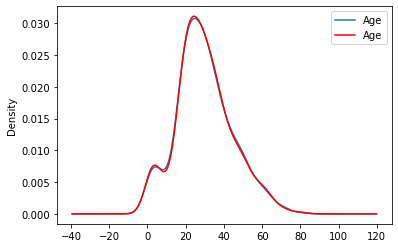

In [84]:
fig = plt.figure()
ax  = fig.add_subplot(111) 
df1_['Age'].plot(kind = 'kde', ax = ax)
df_['Age'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show()

In [85]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Survived'])
df.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [86]:
df.loc[:, 'Age'].dropna().sample(df.loc[:, 'Age'].isnull().sum())

453    49.0
854    44.0
352    15.0
811    39.0
171     4.0
       ... 
297     2.0
694    60.0
155    51.0
199    24.0
526    50.0
Name: Age, Length: 177, dtype: float64

In [87]:
for randomValues_ in df.loc[:, 'Age'].dropna().sample(df.loc[:, 'Age'].isnull().sum(), random_state = 0):
    print(randomValues_, end = " ")

28.0 50.0 0.92 36.0 26.0 36.0 31.0 65.0 65.0 47.0 22.0 26.0 4.0 39.0 21.0 55.0 33.0 0.75 24.0 39.0 20.0 40.0 14.0 29.0 30.0 0.75 36.0 21.0 27.0 40.0 32.0 2.0 20.0 52.0 35.0 42.0 38.0 36.0 20.0 15.0 22.0 21.0 42.0 21.0 28.0 5.0 3.0 24.0 35.0 28.0 38.0 24.0 25.0 32.0 57.0 25.0 13.0 25.0 62.0 42.0 38.0 51.0 26.0 20.0 16.0 29.0 40.0 35.0 2.0 23.0 22.0 36.0 18.0 39.0 58.0 27.0 18.0 19.0 29.0 23.0 0.42 49.0 45.0 33.0 58.0 24.0 34.0 39.0 31.0 57.0 22.0 23.5 23.0 8.0 62.0 4.0 33.0 18.0 26.0 32.0 24.0 28.0 45.0 36.0 19.0 29.0 24.0 50.0 43.0 16.0 21.0 27.0 4.0 36.0 64.0 32.0 34.0 41.0 34.0 17.0 19.0 28.0 26.0 28.0 52.0 36.0 4.0 48.0 43.0 36.0 60.0 45.0 27.0 35.0 27.0 21.0 31.0 5.0 30.0 19.0 32.5 38.0 24.0 36.0 25.0 35.0 45.5 31.0 30.0 22.0 22.0 27.0 43.0 20.0 18.0 22.0 11.0 29.0 24.5 17.0 20.0 56.0 21.0 2.0 30.0 19.0 49.0 36.0 8.0 80.0 50.0 18.0 22.0 25.0 15.0 34.0 15.0 

In [88]:
valueRandom_ = df.loc[:, 'Age'].dropna().sample(df.loc[:, 'Age'].isnull().sum(), random_state = 0).values
nanIndex_    = df.loc[df.loc[:, 'Age'].isnull(), 'Age'].index

for index_, value_ in zip(nanIndex_, valueRandom_):
    print(f"{index_} has random value # {value_}", end = "\t")

5 has random value # 28.0	17 has random value # 50.0	19 has random value # 0.92	26 has random value # 36.0	28 has random value # 26.0	29 has random value # 36.0	31 has random value # 31.0	32 has random value # 65.0	36 has random value # 65.0	42 has random value # 47.0	45 has random value # 22.0	46 has random value # 26.0	47 has random value # 4.0	48 has random value # 39.0	55 has random value # 21.0	64 has random value # 55.0	65 has random value # 33.0	76 has random value # 0.75	77 has random value # 24.0	82 has random value # 39.0	87 has random value # 20.0	95 has random value # 40.0	101 has random value # 14.0	107 has random value # 29.0	109 has random value # 30.0	121 has random value # 0.75	126 has random value # 36.0	128 has random value # 21.0	140 has random value # 27.0	154 has random value # 40.0	158 has random value # 32.0	159 has random value # 2.0	166 has random value # 20.0	168 has random value # 52.0	176 has random value # 35.0	180 has random value # 42.0	181 has random va

In [89]:
df.loc[df.loc[:, 'Age'].isnull(), 'Age'] = valueRandom_
print("done !")

done !


In [90]:
df.isnull().sum()

Survived    0
Age         0
dtype: int64

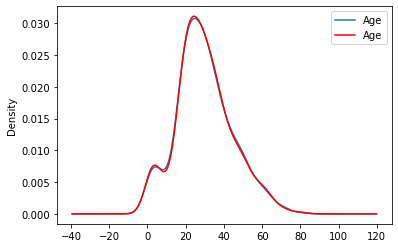

In [91]:
fig = plt.figure()
ax  = fig.add_subplot(111) 
df1_['Age'].plot(kind = 'kde', ax = ax)
df['Age'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show()

<AxesSubplot:ylabel='Density'>

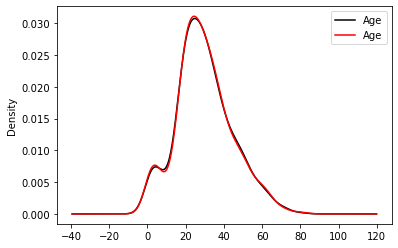

In [92]:
df1_.loc[:, 'Age'].plot.kde(color = 'black', legend = True)
df.loc[:, 'Age'].plot.kde(color = 'red', legend = True)

<AxesSubplot:>

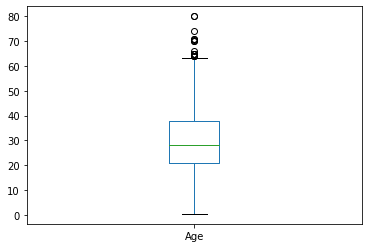

In [93]:
df.loc[:, 'Age'].plot.box()

<AxesSubplot:>

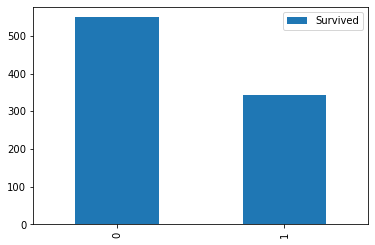

In [94]:
df.loc[:, 'Survived'].value_counts().plot.bar(legend = True)

In [95]:
#### load the dataset again
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Survived'])
### print the dataset 
df.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [96]:
####Find the mean median and mode of "Age" column

#Find the mean of that "Age" column
df.loc[:, 'Age'].fillna(df.loc[:, 'Age'].mean(), inplace = True)

<AxesSubplot:ylabel='Density'>

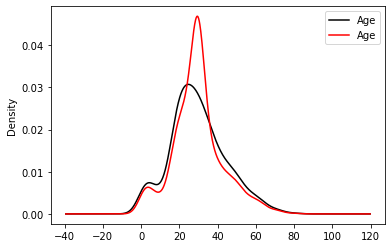

In [97]:
df1_.loc[:, 'Age'].plot.kde(legend = True, color = 'black')
df.loc[:, 'Age'].plot.kde(legend = True, color = 'red')

<AxesSubplot:>

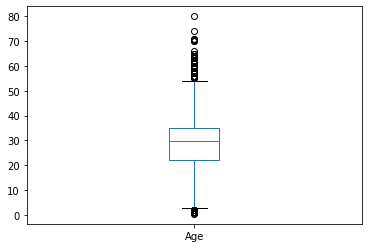

In [98]:
df.loc[:, 'Age'].plot.box()

<AxesSubplot:ylabel='Density'>

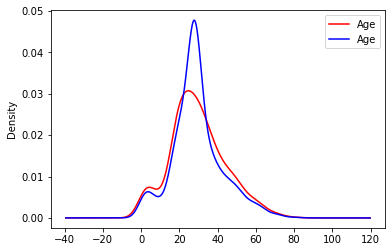

In [99]:
### Find the median of that "Age" column
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Survived'])
df.loc[:, 'Age'].fillna(df.loc[:, 'Age'].median(), inplace = True)
###plot the "kde" daigram 
df1_.loc[:, 'Age'].plot.kde(legend = True, color = 'red')
df.loc[:, 'Age'].plot.kde(legend = True, color = 'blue')

<AxesSubplot:>

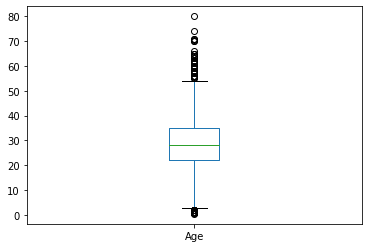

In [100]:
df.loc[:, 'Age'].plot.box()

In [101]:
#import the dataset
df = pd.read_csv('adult.csv', na_values = ['?', '??', '???'])
#print the dataset 
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [102]:
##### print the shape of dataset
print("The number of rows of this dataset is    = ", df.shape[0],'\n')
print("The number of columns of this dataset is = ", df.shape[1],'\n')

The number of rows of this dataset is    =  48842 

The number of columns of this dataset is =  15 



In [103]:
###find out how many null values are present in this dataset
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [104]:
#Check there is a realtionship of this dataset or not 
df.loc[df.loc[:, 'workclass'].isnull(), ['occupation', 'income']]

,occupation,income
4,NaN,<=50K
6,NaN,<=50K
13,NaN,<=50K
22,NaN,<=50K
35,NaN,<=50K
...,...,...
48811,NaN,>50K
48812,NaN,<=50K
48820,NaN,>50K
48822,NaN,<=50K


In [105]:
####So, what we will have to do is use "Capturing NaN values with new features"
df.loc[:, 'workclass_'] = np.where(df.loc[:, 'workclass'].isnull(), 1, 0)
### print the data frame
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,1


In [106]:
####So, what we will have to do is use "Capturing NaN values with new features"
df.loc[:, 'occupation_'] = np.where(df.loc[:, 'occupation'].isnull(), 1, 0)
### print the data frame
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,1,1


In [107]:
#### Now, use "Mode" for filling the missing value in "workclass"
df.loc[:, 'workclass'].fillna(df.loc[:, 'workclass'].mode())
print(" Done with fillna with mode in workclass column")
#### Now, use "Mode" for filling the missing value in "occupation"
df.loc[:, 'occupation'].fillna(df.loc[:, 'occupation'].mode())
print(" Done with fillna with mode in occupation column")
#### print the dataset
df.head()

 Done with fillna with mode in workclass column
 Done with fillna with mode in occupation column


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,1,1


In [108]:
### print the null value is present or not 
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
workclass_            0
occupation_           0
dtype: int64

In [109]:
df.loc[:, 'workclass'].isnull().sum()

2799

In [110]:
df.loc[:, 'workclass'].mode()

0    Private
dtype: object

In [111]:
df.loc[:, 'workclass'] = df.loc[:, 'workclass'].fillna('Private')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0
4,18,Private,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,1,1


In [112]:
df.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
workclass_            0
occupation_           0
dtype: int64

In [113]:
df.loc[:, 'occupation'].mode()

0    Prof-specialty
dtype: object

In [114]:
df.loc[:, 'occupation'] = df.loc[:, 'occupation'].fillna('Prof-specialty')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,1,1


In [115]:
for index_, value_ in zip(df.isnull().sum().index, df.isnull().sum().values):
    print(f"{index_} has null values = {value_}", end = " | ")

age has null values = 0 | workclass has null values = 0 | fnlwgt has null values = 0 | education has null values = 0 | educational-num has null values = 0 | marital-status has null values = 0 | occupation has null values = 0 | relationship has null values = 0 | race has null values = 0 | gender has null values = 0 | capital-gain has null values = 0 | capital-loss has null values = 0 | hours-per-week has null values = 0 | native-country has null values = 857 | income has null values = 0 | workclass_ has null values = 0 | occupation_ has null values = 0 | 

In [116]:
#### In order to solve the problem of missing value in "native-country" using "Random sampling"
for value_ in df.loc[:, 'native-country'].dropna().sample(df.loc[:, 'native-country'].isnull().sum(), random_state = 0):
    print(value_, end = " | ")

United-States | United-States | South | United-States | United-States | Philippines | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | India | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-States | United-Sta

In [117]:
random_values_ = df.loc[:, 'native-country'].dropna().sample(df.loc[:, 'native-country'].isnull().sum(), random_state = 0).values
nan_index_     = df.loc[df.loc[:, 'native-country'].isnull(), 'native-country'].index
df.loc[nan_index_, 'native-country'] = random_values_
print("Done !")
#print the null values in the dataframe
df.isnull().sum()

Done !


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
workclass_         0
occupation_        0
dtype: int64

In [118]:
if df.isnull().sum().sum() == 0:
    print("There is no null value presence in the dataframe")
else:
    print("You should be used another approach in order to insert the null values")

There is no null value presence in the dataframe


In [119]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,1,1


In [120]:
df.loc[:, 'income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [121]:
labelEncoder_ = {'<=50K': 1, '>50K': 0}
df.loc[:, 'income'] = df.loc[:, 'income'].map(labelEncoder_)
###print the dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0,0,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1,1,1


In [122]:
columns_ = df.select_dtypes(include = 'object').columns

In [123]:
for column_ in df.select_dtypes(include = 'object').columns:
    print(f"{column_} has unique value: {df.loc[:, column_].nunique()}")

workclass has unique value: 8
education has unique value: 16
marital-status has unique value: 7
occupation has unique value: 14
relationship has unique value: 6
race has unique value: 5
gender has unique value: 2
native-country has unique value: 41


In [124]:
###There is a column named education which is ordinal - so what i will have do is to "Target guided ordinal encoding"
df.loc[:, 'education'] = df.loc[:, 'education'].map({key_:value_ for value_, key_ in enumerate(df.groupby(['education'])['income'].mean().sort_values(ascending = True).index)})
print("Done !")
#### prin the df
df.head()

Done !


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,Private,226802,13,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1,0,0
1,38,Private,89814,7,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1,0,0
2,28,Local-gov,336951,4,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0,0,0
3,44,Private,160323,6,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0,0,0
4,18,Private,103497,6,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1,1,1


In [125]:
####One Hot Encoding in "workclass", "marital-status", "relationship", "racerace", "gender"
get_dummies_ = pd.get_dummies(df[['workclass', 'marital-status', 'relationship', 'race', 'gender', 'occupation']], drop_first = True)
get_dummies_

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
48838,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
48839,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,Private,226802,13,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1,0,0
1,38,Private,89814,7,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1,0,0
2,28,Local-gov,336951,4,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0,0,0
3,44,Private,160323,6,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0,0,0
4,18,Private,103497,6,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1,1,1


In [127]:
df.drop(['workclass', 'marital-status', 'relationship', 'race', 'gender', 'occupation'], axis = 1, inplace = True)
df.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,25,226802,13,7,0,0,40,United-States,1,0,0
1,38,89814,7,9,0,0,50,United-States,1,0,0
2,28,336951,4,12,0,0,40,United-States,0,0,0
3,44,160323,6,10,7688,0,40,United-States,0,0,0
4,18,103497,6,10,0,0,30,United-States,1,1,1


In [128]:
data = [get_dummies_, df]
pd.concat(data)

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,occupation_
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,257302.0,4.0,12.0,0.0,0.0,38.0,United-States,1.0,0.0,0.0
48838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,154374.0,7.0,9.0,0.0,0.0,40.0,United-States,0.0,0.0,0.0
48839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,151910.0,7.0,9.0,0.0,0.0,40.0,United-States,1.0,0.0,0.0
48840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,201490.0,7.0,9.0,0.0,0.0,20.0,United-States,1.0,0.0,0.0


In [129]:
df = pd.concat([df, get_dummies_], axis =1)
df

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,13,7,0,0,40,United-States,1,0,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,7,9,0,0,50,United-States,1,0,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,4,12,0,0,40,United-States,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,6,10,7688,0,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,6,10,0,0,30,United-States,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,4,12,0,0,38,United-States,1,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,154374,7,9,0,0,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,151910,7,9,0,0,40,United-States,1,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,201490,7,9,0,0,20,United-States,1,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,13,7,0,0,40,United-States,1,0,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,7,9,0,0,50,United-States,1,0,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,4,12,0,0,40,United-States,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,6,10,7688,0,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,6,10,0,0,30,United-States,1,1,...,0,0,0,0,0,1,0,0,0,0


In [131]:
### Count or occurance frequency in "native-country"
df.loc[:, 'native-country'] = df.loc[:, 'native-country'].map(df.groupby(['native-country'])['income'].mean().to_dict())
####print the df
df.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,13,7,0,0,40,0.755861,1,0,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,7,9,0,0,50,0.755861,1,0,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,4,12,0,0,40,0.755861,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,6,10,7688,0,40,0.755861,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,6,10,0,0,30,0.755861,1,1,...,0,0,0,0,0,1,0,0,0,0


In [132]:
y = df.loc[:, 'income']

In [133]:
df.drop(['income'], axis = 1, inplace = True)
print("Dropped !")

Dropped !


In [134]:
df.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_,occupation_,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,13,7,0,0,40,0.755861,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,7,9,0,0,50,0.755861,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,4,12,0,0,40,0.755861,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,6,10,7688,0,40,0.755861,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,6,10,0,0,30,0.755861,1,1,...,0,0,0,0,0,1,0,0,0,0


In [135]:
X = df.iloc[:].values
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

scaling_ = StandardScaler()
X_train  = scaling_.fit_transform(X_train)
X_test   = scaling_.transform(X_test)

In [136]:
from xgboost import XGBClassifier
xgboostClassifier_ = XGBClassifier(learning_rate=0.01)
xgboostClassifier_.fit(X_train, y_train)

[01:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [137]:
predict_ = xgboostClassifier_.predict(X_test)
accuracy_score(predict_, y_test)

0.8693800671525673

In [139]:
import warnings
warnings.filterwarnings('ignore')
X = X
# KFold(n_splits=2, random_state=None, shuffle=False)
kf = KFold(n_splits=10)
accuracyList_ = []
countValue_   = 0
for train_index, test_index in kf.split(X):
    print(f"Cross Validation # {countValue_}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgboostClassifier_ = XGBClassifier().fit(X_train, y_train)
    print(round(accuracy_score(xgboostClassifier_.predict(X_test), y_test), 4))
    accuracyList_.append(round(accuracy_score(xgboostClassifier_.predict(X_test), y_test), 4))
    countValue_ = countValue_ + 1

Cross Validation # 0
[01:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8708
Cross Validation # 1
[01:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8725
Cross Validation # 2
[01:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beh

In [143]:
from functools import reduce
print("After cross validation - the accuracy is: ", reduce(lambda x, y: (x + y), accuracyList_))

After cross validation - the accuracy is:  8.7264


In [146]:
print("After cross validation - the accuracy is: ", np.array(accuracyList_).mean())

After cross validation - the accuracy is:  0.87264


<AxesSubplot:>

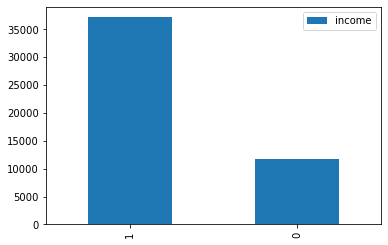

In [160]:
yValue_ = pd.DataFrame(y)
yValue_.loc[:, 'income'].value_counts().plot.bar(legend = True)

In [163]:
print("The 1 - value counts in this dataset is: ", yValue_.value_counts()[0])
print("The 0 - value counts in this dataset is: ", yValue_.value_counts()[1])

The 1 - value counts in this dataset is:  11687
The 0 - value counts in this dataset is:  37155


In [164]:
yValue_.value_counts()

income
1         37155
0         11687
dtype: int64

In [165]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<AxesSubplot:>

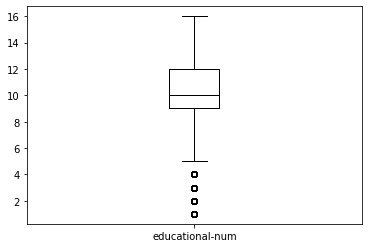

In [168]:
df.loc[:, 'educational-num'].plot.box(legend = True, color = 'black')

In [169]:
#load the dataset
from sklearn import datasets

In [186]:
df = datasets.load_iris()

In [215]:
df = datasets.load_iris()
####print teh dataset 
X  = df.data[:, :-1]
y = df.target

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
xgboostClassifier_ = XGBClassifier()
xgboostClassifier_.fit(X_train, y_train)
predictValue_ = xgboostClassifier_.predict(X_test)
accuracy_score(predictValue_, y_test)

[01:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8947368421052632

In [192]:
from sklearn.tree import DecisionTreeClassifier
decisionTree_ = DecisionTreeClassifier()
decisionTree_.fit(X_train, y_train)
predictedValue_ = decisionTree_.predict(X_test)
accuracy_score(predictedValue_, y_test)

0.9736842105263158

In [235]:
kFold_ = KFold(n_splits = 6, shuffle = True, random_state = 0)
count_ = 1
for trainIndex_, testIndex_ in kFold_.split(df):
    print("Cross validation is # ", count_, '\n')
    X_train, X_test = X[trainIndex_], X[testIndex_]
    y_train, y_test = y[trainIndex_], y[testIndex_]
    decisionTree_   = DecisionTreeClassifier()
    decisionTree_.fit(X_train, y_train)
    predictedValue_ = decisionTree_.predict(X_test)
    print(accuracy_score(predictedValue_, y_test))

Cross validation is #  1 

1.0
Cross validation is #  1 

1.0
Cross validation is #  1 

1.0
Cross validation is #  1 

1.0
Cross validation is #  1 

1.0
Cross validation is #  1 

1.0


In [179]:
X = pd.DataFrame(X)
X

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [161]:
# df.loc[:, 'Age'].plot.kde(legend = True, color = 'blue')

In [ ]:
# df.loc[:, 'Age'].plot.box(legend = True)

In [236]:
import numpy as np
import pandas as pd

In [238]:
df = pd.read_csv('Churn-Modelling.csv')
#### shpw the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

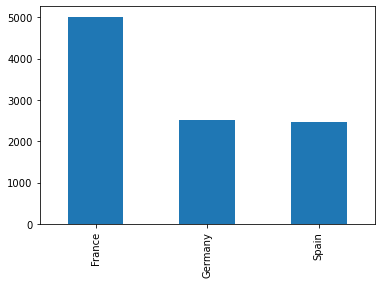

In [241]:
df.loc[:, 'Geography'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

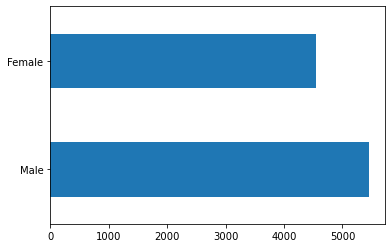

In [246]:
df.loc[:, 'Gender'].value_counts().plot(kind = 'barh')

In [250]:
#### Using Label Encoding in this dataset
df.loc[:, 'Gender'] = df.loc[:, 'Gender'].map({'Female': 0, 'Male':1})
print("Label encoding is done !")

Label encoding is done !


In [251]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [253]:
df.loc[:, 'Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [255]:
df.loc[:, 'Geography'] = df.loc[:, 'Geography'].map({'France': 5014, 'Germany': 2501, 'Spain': 2477})
print("Encoding is done !")

Encoding is done !


In [256]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,5014,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2477,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,5014,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,5014,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2477,0,43,2,125510.82,1,1,1,79084.10,0


In [257]:
#### drop the "Surname", "CustomerId" and "RowNumber" columns for the training dataset
print("Before the dropping, the shape of this dataset is : ", df.shape,'\n')
df.drop(['Surname', 'CustomerId', 'Surname'], axis = 1, inplace = True)
print("Dropped the columns\n")
print("After dropping the shape of this dataset is: ", df.shape,'\n')

Before the dropping, the shape of this dataset is :  (10000, 14) 

Dropped the columns

After dropping the shape of this dataset is:  (10000, 12) 



In [258]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,5014,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2477,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,5014,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,5014,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2477,0,43,2,125510.82,1,1,1,79084.10,0


In [260]:
#### Split the dataset of X, y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [261]:
X

array([[1.0000000e+00, 6.1900000e+02, 5.0140000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [2.0000000e+00, 6.0800000e+02, 2.4770000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [3.0000000e+00, 5.0200000e+02, 5.0140000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [9.9980000e+03, 7.0900000e+02, 5.0140000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [9.9990000e+03, 7.7200000e+02, 2.5010000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+04, 7.9200000e+02, 5.0140000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [262]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [263]:
##### split the datset for Train and Test
from sklearn.model_selection import train_test_split
##### split it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [265]:
print("The shape of X_train is = ", X_train.shape, '\n')
print("The shape of X_test  is = ", X_test.shape, '\n')
print("The shape of y_train is = ", y_train.shape, '\n')
print("The shape of y_test  is = ", y_test.shape, '\n')

The shape of X_train is =  (7500, 11) 

The shape of X_test  is =  (2500, 11) 

The shape of y_train is =  (7500,) 

The shape of y_test  is =  (2500,) 



In [270]:
#### In order to find the accuracy
from sklearn.metrics import accuracy_score

In [273]:
#### Call the model in order to predict
from sklearn.ensemble import RandomForestClassifier
random_forest_ = RandomForestClassifier()
random_forest_.fit(X_train, y_train)
predict_value_ = random_forest_.predict(X_test)
##### accuracy 
accuracy_ = accuracy_score(predict_value_, y_test)
print("The accuracy of this dataset is: ", accuracy_*100, '%')

The accuracy of this dataset is:  86.92 %


In [274]:
#### K fold Cross Validation
from sklearn.model_selection import KFold

In [279]:
kFold_ = KFold(n_splits = 10, shuffle = True, random_state = 0)
accuracy_list_ = []
count_ = 1
for trainIndex_, testIndex_ in kFold_.split(df):
    print("Cross validation is # ", count_, '\n')
    X_train, X_test = X[trainIndex_], X[testIndex_]
    y_train, y_test = y[trainIndex_], y[testIndex_]
    random_forest_  = RandomForestClassifier()
    random_forest_.fit(X_train, y_train)
    predictedValue_ = random_forest_.predict(X_test)
    print(accuracy_score(predictedValue_, y_test))
    count_ = count_ + 1
    accuracy_list_.append(accuracy_score(predictedValue_, y_test))

Cross validation is #  1 

0.857
Cross validation is #  2 

0.871
Cross validation is #  3 

0.865
Cross validation is #  4 

0.856
Cross validation is #  5 

0.864
Cross validation is #  6 

0.863
Cross validation is #  7 

0.858
Cross validation is #  8 

0.846
Cross validation is #  9 

0.857
Cross validation is #  10 

0.864


In [284]:
print("After CROSS VALIDATION the accuracy is = ", np.array(accuracy_list_).mean()*100, '%')

After CROSS VALIDATION the accuracy is =  86.01 %


In [286]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_classifier_ = GradientBoostingClassifier( n_estimators = 200)
gradient_classifier_.fit(X_train, y_train)
predict_value_ = gradient_classifier_.predict(X_test)
accuracy_score(predict_value_, y_test)

0.864

In [287]:
kFold_ = KFold(n_splits = 10, shuffle = True, random_state = 0)
accuracy_list_ = []
count_ = 1
for trainIndex_, testIndex_ in kFold_.split(df):
    print("Cross validation is # ", count_, '\n')
    X_train, X_test = X[trainIndex_], X[testIndex_]
    y_train, y_test = y[trainIndex_], y[testIndex_]
    random_forest_  = GradientBoostingClassifier()
    random_forest_.fit(X_train, y_train)
    predictedValue_ = random_forest_.predict(X_test)
    print(accuracy_score(predictedValue_, y_test))
    count_ = count_ + 1
    accuracy_list_.append(accuracy_score(predictedValue_, y_test))

Cross validation is #  1 

0.866
Cross validation is #  2 

0.869
Cross validation is #  3 

0.861
Cross validation is #  4 

0.86
Cross validation is #  5 

0.865
Cross validation is #  6 

0.871
Cross validation is #  7 

0.868
Cross validation is #  8 

0.839
Cross validation is #  9 

0.858
Cross validation is #  10 

0.863


In [290]:
addition_ = 0
for value_ in accuracy_list_:
    addition_ = addition_ + value_
accuracy_ = addition_/len(accuracy_list_)
print("Using Gradient Boosting, The accuracy is = ", accuracy_*100,'\n')

Using Gradient Boosting, The accuracy is =  86.20000000000002 



In [297]:
df.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')